<a href="https://colab.research.google.com/github/ajaysuyal7/network-intruction-detection/blob/main/binomial_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Study - Networking

### NETWORK intrusion Detection

1. Binomial Classification : Activity is normal or Attack




In [ ]:
# Importing libraries
#!pip install ydata-profiling

import os
import numpy as np
import pandas as pd
#import ydata_profiling as pandas_profiling # Use ydata_profiling instead of pandas_profiling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# train Dataset
train=pd.read_csv('/content/Train.txt',sep=',',header=None)

In [ ]:
["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
 "num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
 "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
train.shape

(125973, 43)

In [ ]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [ ]:
train.columns=columns

In [ ]:
test=pd.read_csv('/content/Test.txt',header=None ,names=columns)

In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


## EDA (Explotratry Data Analysis)

In [ ]:
# BAsic data auditing

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train.isna().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train.attack.value_counts()

# Overall distribution of Target
# Binomial

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
test.isna().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
test.attack.value_counts()

,count
attack,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
train.describe(include='object')

,protocol_type,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [ ]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
test.describe(include=object)

,protocol_type,service,flag,attack
count,22544,22544,22544,22544
unique,3,64,11,38
top,tcp,http,SF,normal
freq,18880,7853,14875,9711


## Binomial classification : activity normal or attack

## for taining Dataset

<Axes: ylabel='attack'>

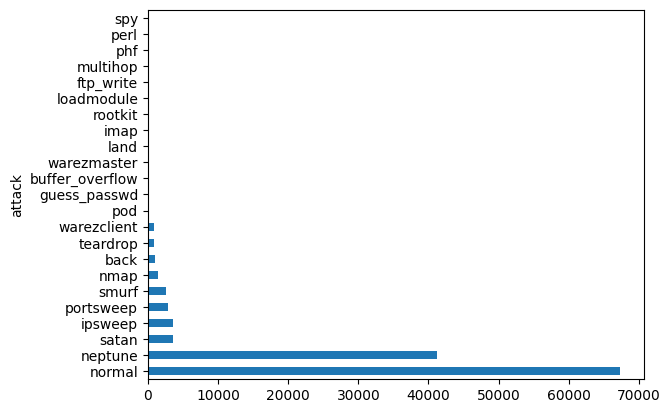

In [ ]:
# bulding the bar plot

train.attack.value_counts().plot(kind='barh')

<Axes: ylabel='attack'>

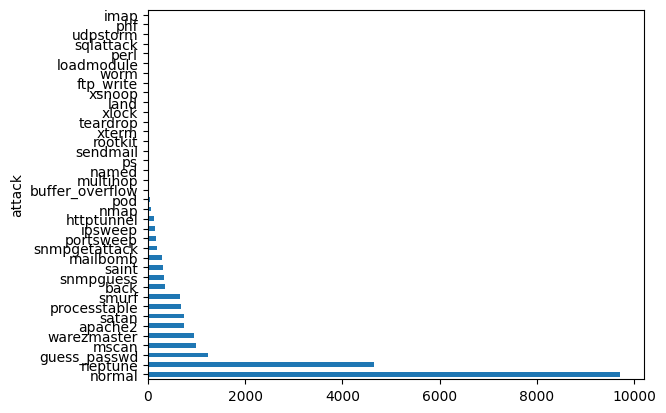

In [ ]:
test.attack.value_counts().plot(kind='barh')

In [ ]:
train_b=train.copy()
test_b=test.copy()

In [ ]:
train_b['attack_category']=train_b.attack.apply(lambda x: 0 if x=='normal' else 1)
test_b['attack_category']=np.where(test_b.attack=='normal',0,1)

In [ ]:
# define the attack column to have classes 'Normal' and 'attack'
# bulding a bar plot on top of this

train['attack_category']=train.attack.apply(lambda x: 'normal' if x=='normal' else 'attack')
test['attack_category']=test.attack.apply(lambda x: 'normal' if x=='normal' else 'attack')

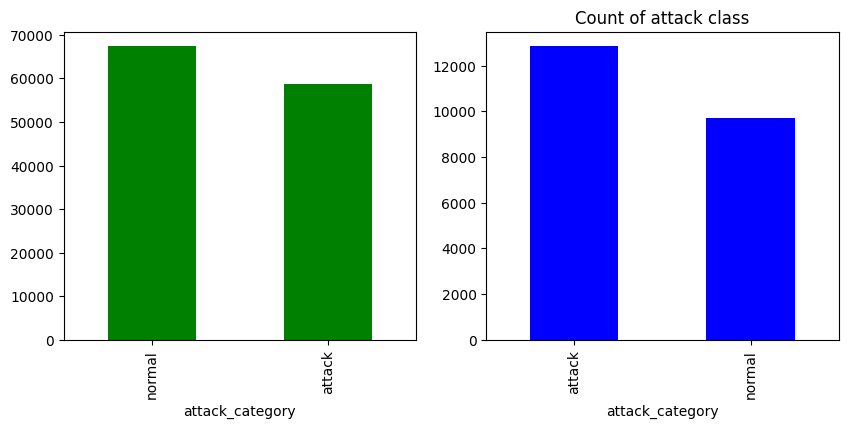

In [ ]:
_,ax=plt.subplots(1,2,figsize=(10,4))
plt.title('Count of attack class')
train.attack_category.value_counts().plot(kind='bar',ax=ax[0],color='g')
test.attack_category.value_counts().plot(kind='bar',ax=ax[1],color='b')
plt.show()

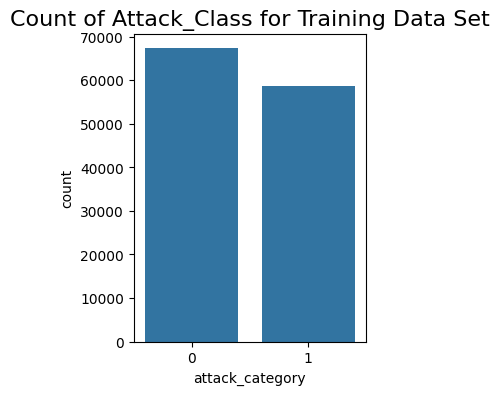

In [ ]:
plt.figure(figsize=(3,4))
plt.title('Count of Attack_Class for Training Data Set',fontsize=16)
sns.countplot(x="attack_category", data=train_b)
plt.show()

In [ ]:
# remove the attack column

train_b.drop(columns=['attack'],inplace=True)
test_b.drop(columns=['attack'],inplace=True)

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


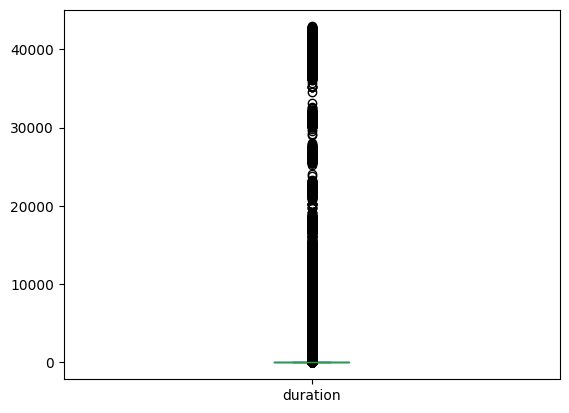

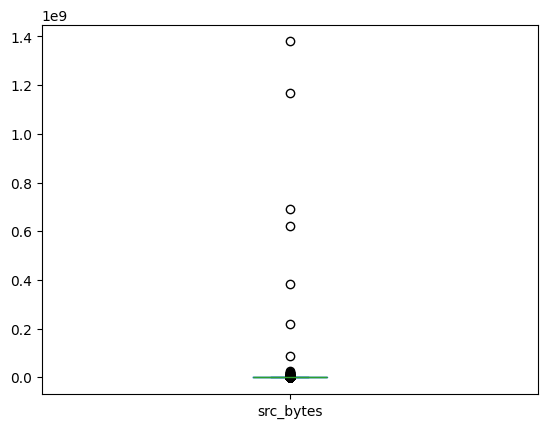

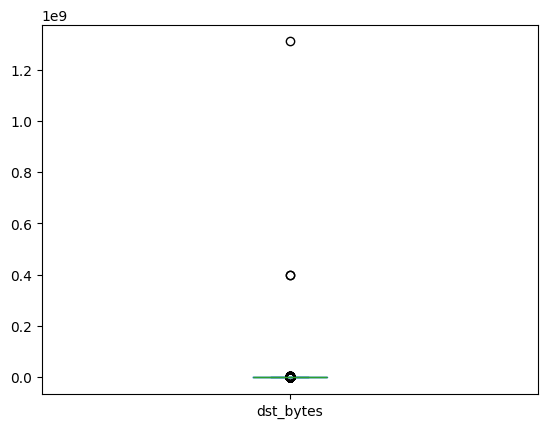

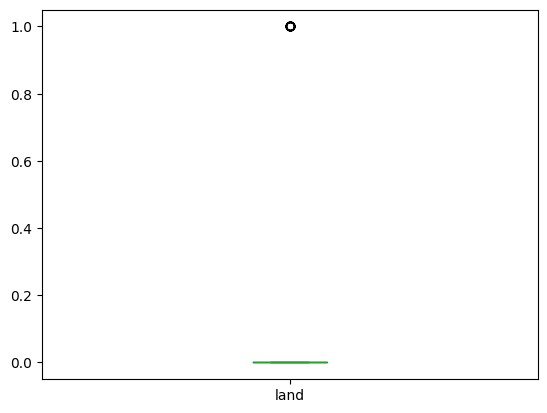

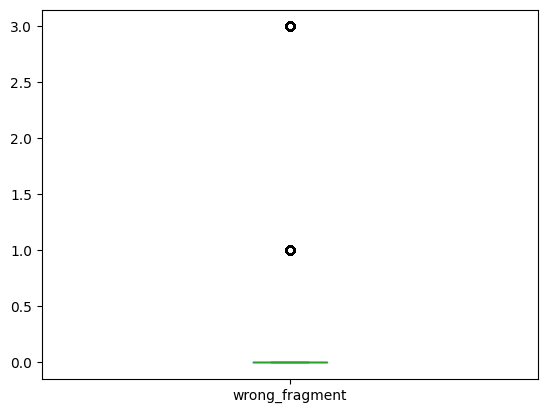

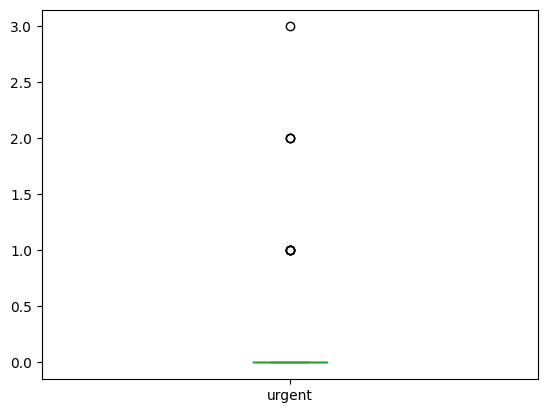

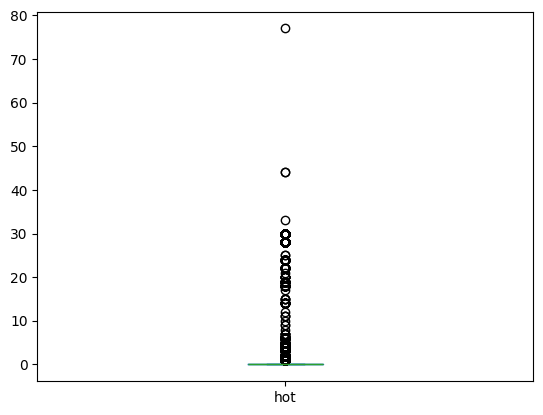

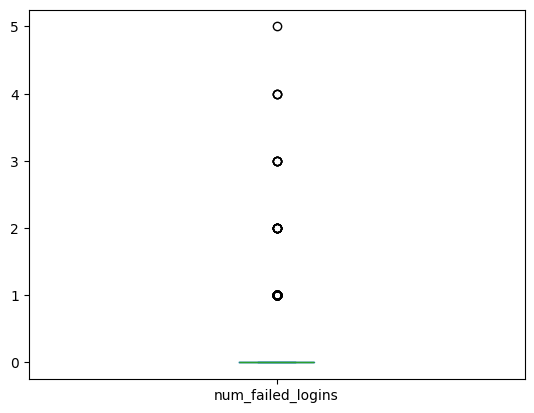

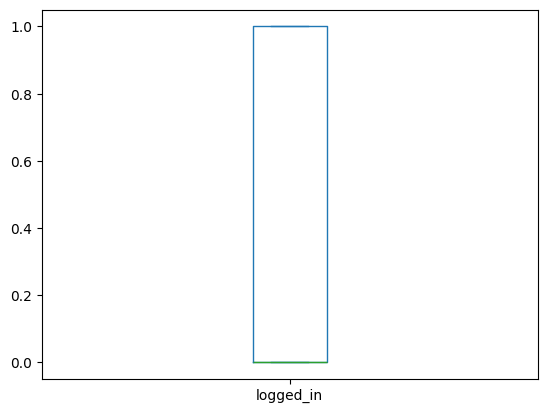

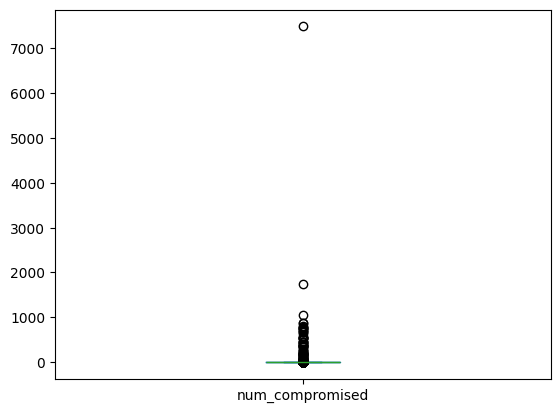

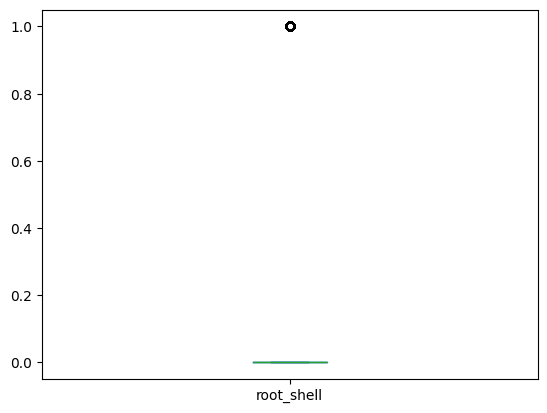

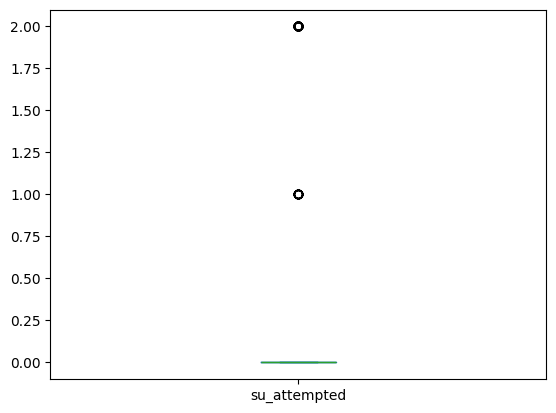

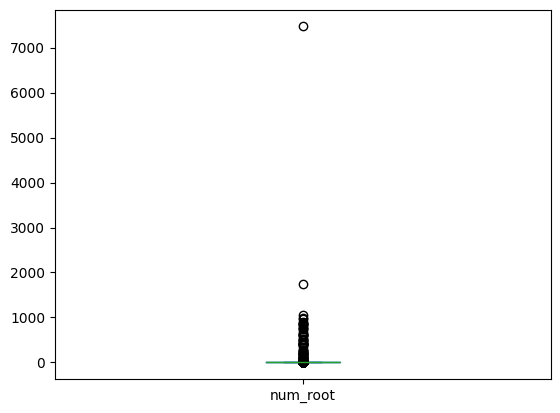

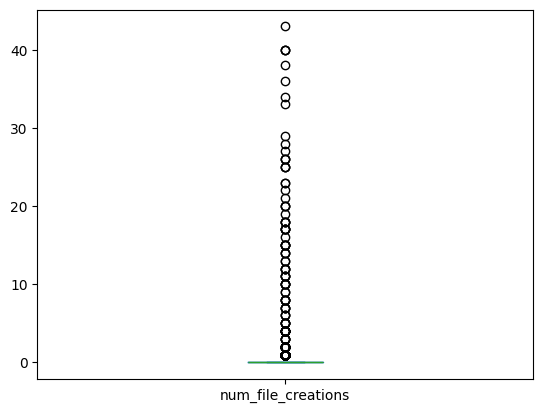

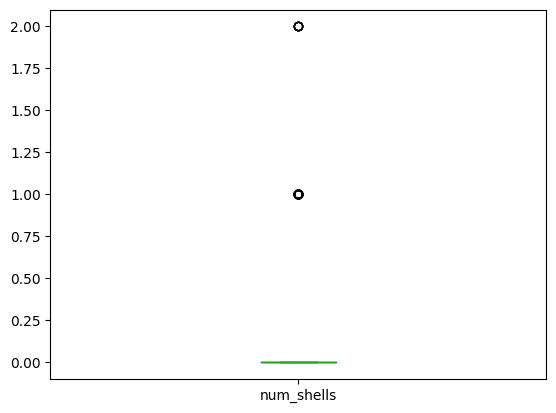

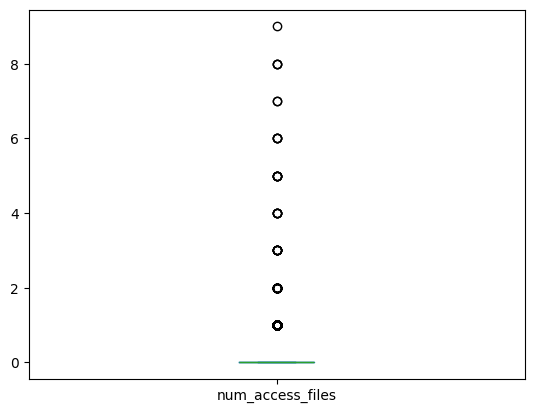

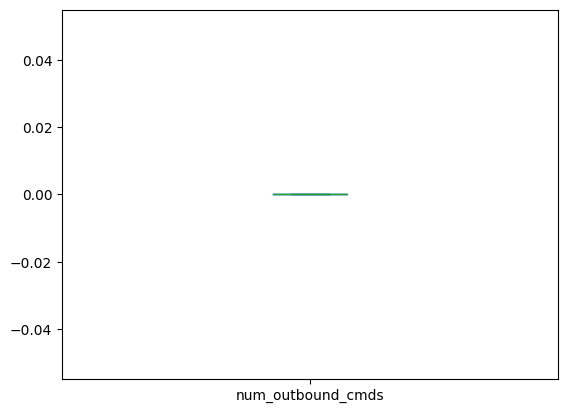

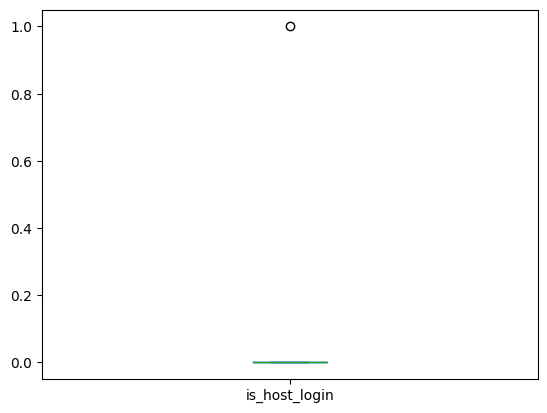

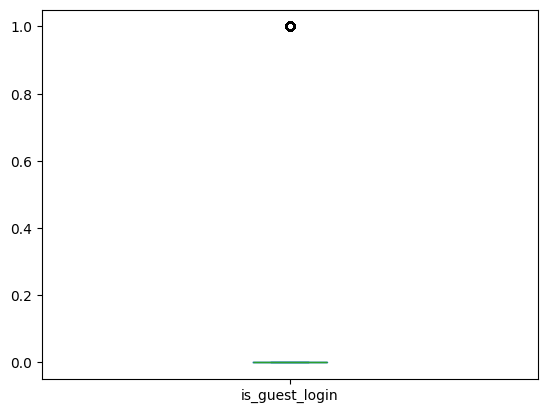

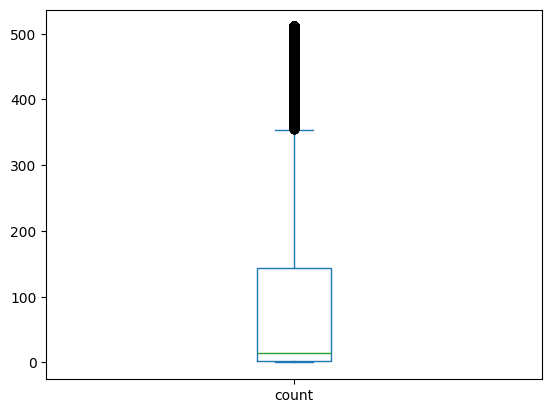

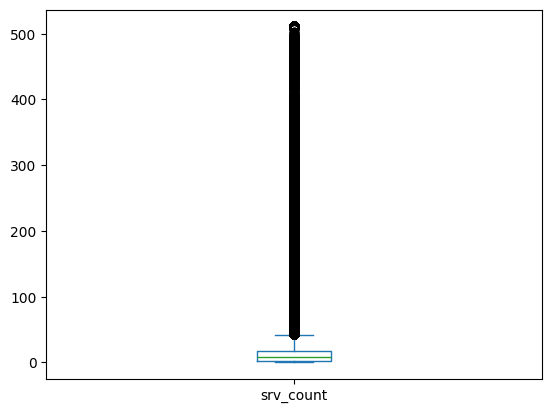

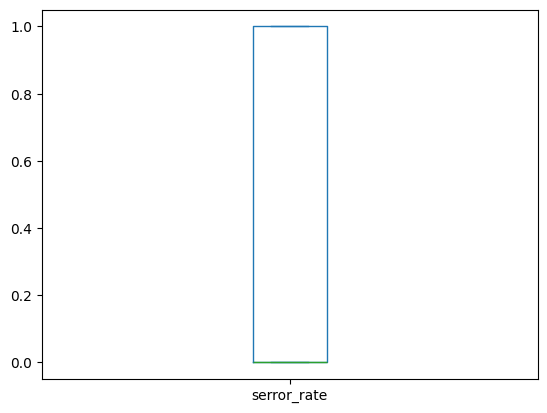

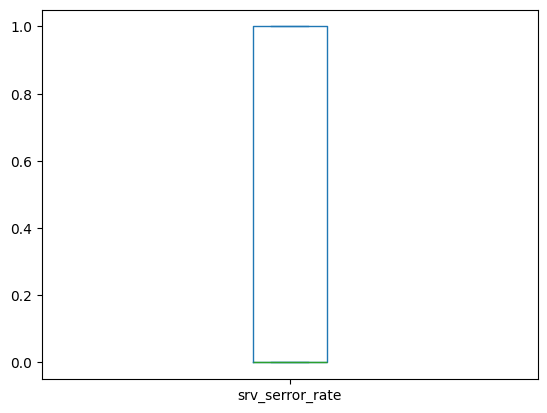

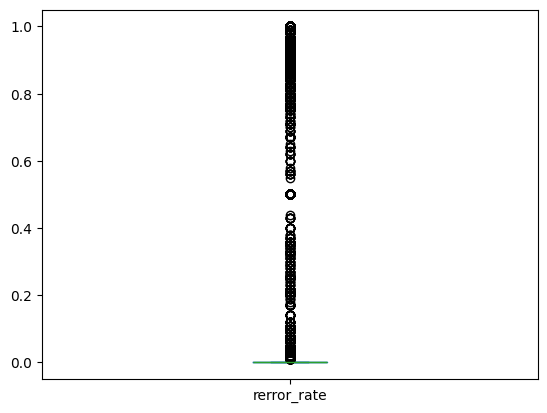

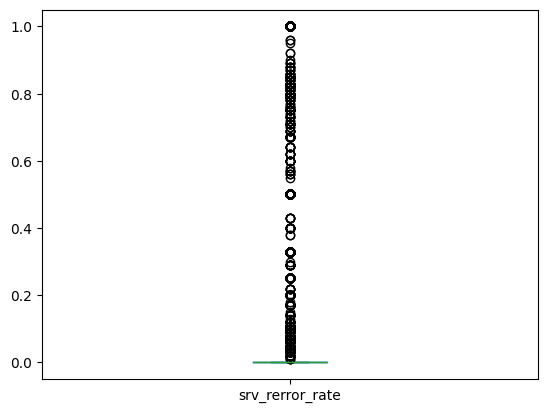

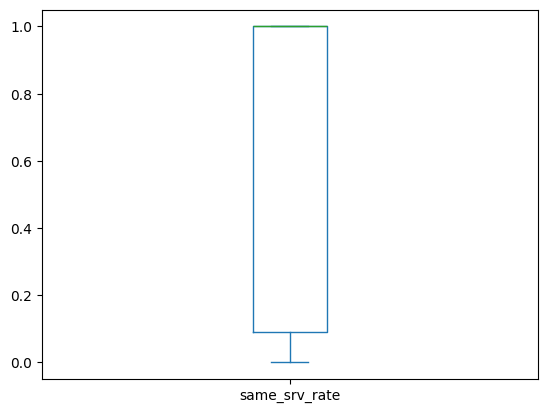

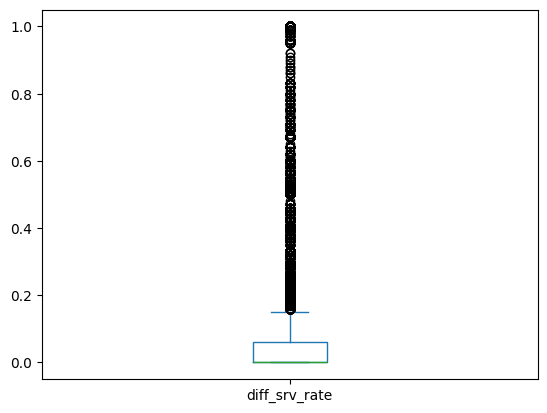

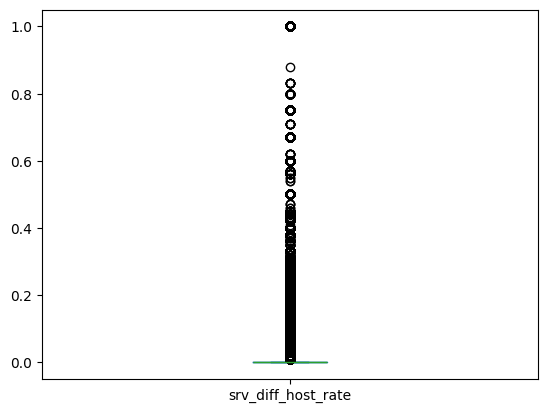

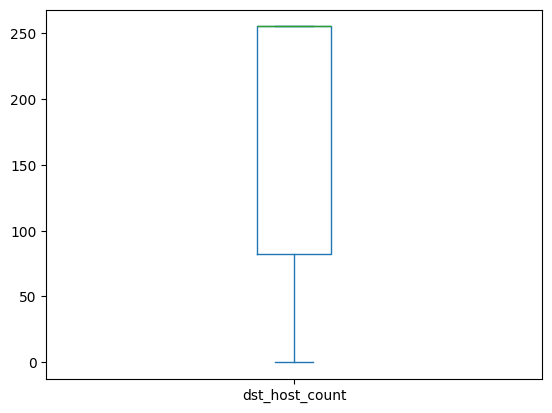

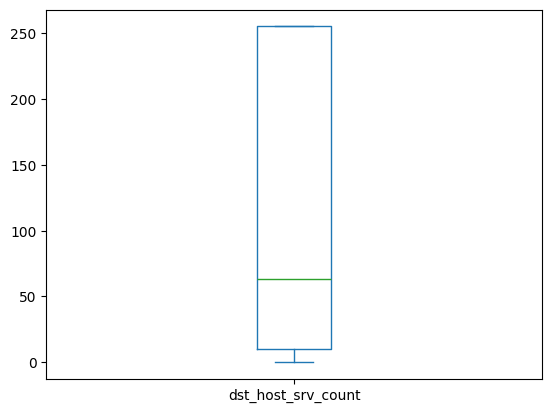

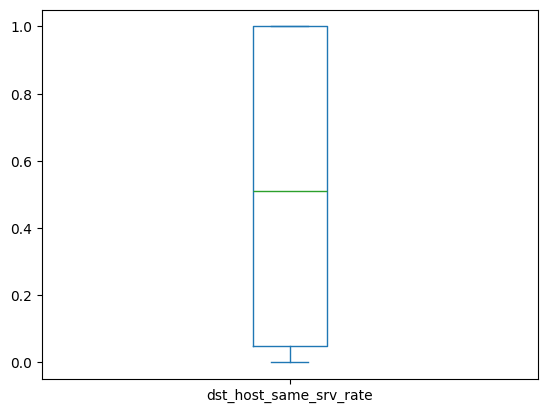

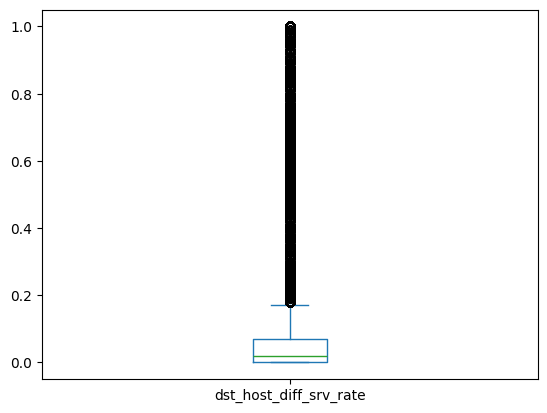

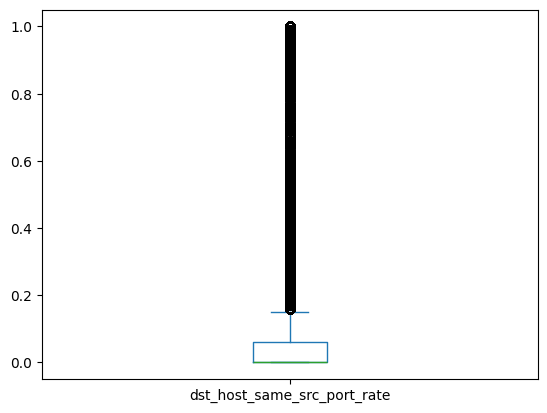

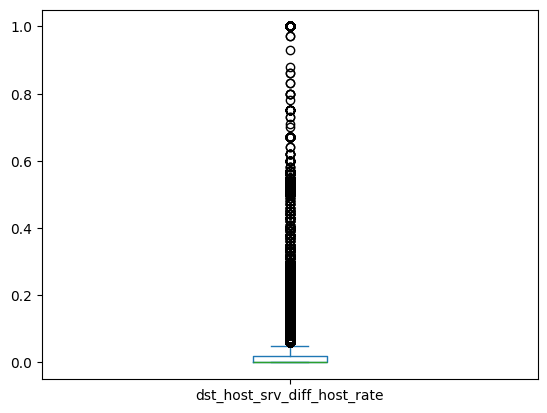

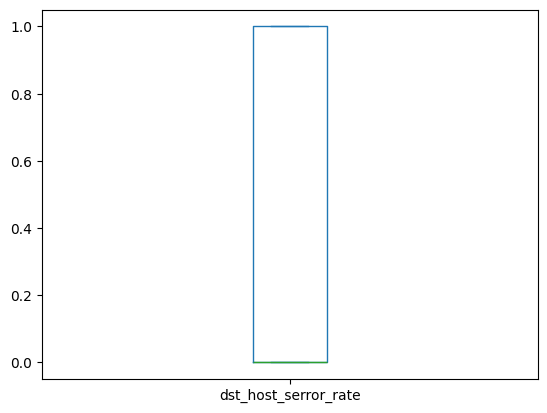

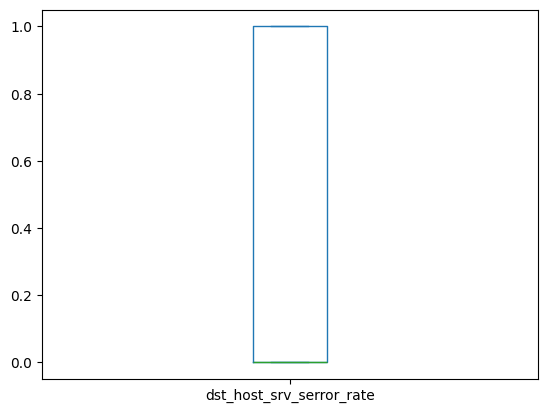

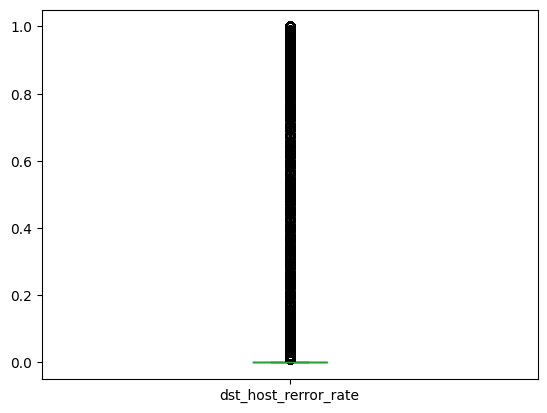

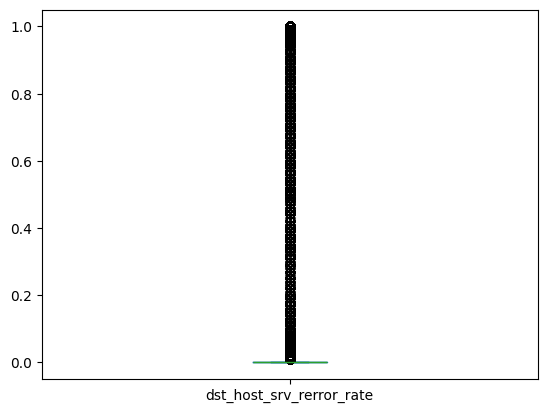

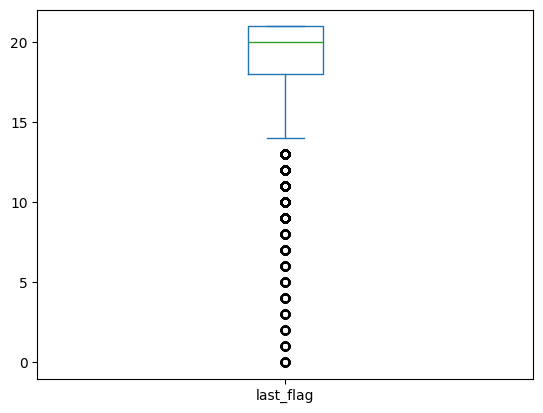

,0
duration,None
src_bytes,None
dst_bytes,None
land,None
wrong_fragment,None
urgent,None
hot,None
num_failed_logins,None
logged_in,None
num_compromised,None


In [ ]:
# write a code to plot the outliers using box plot
# write a code to handle outliers

def box_plot(x):
  x.plot(kind='box')
  plt.show()

train.select_dtypes(['int','float']).apply(box_plot)

In [ ]:
def percentile(x):
  lc=x.quantile(0.01)
  uc=x.quantile(0.99)
  return np.clip(x,a_min=lc,a_max=uc)

numeric_columns=train.select_dtypes(['int','float']).columns
train_b[numeric_columns]=train[numeric_columns].apply(percentile)
test_b[numeric_columns]=test[numeric_columns].apply(percentile)

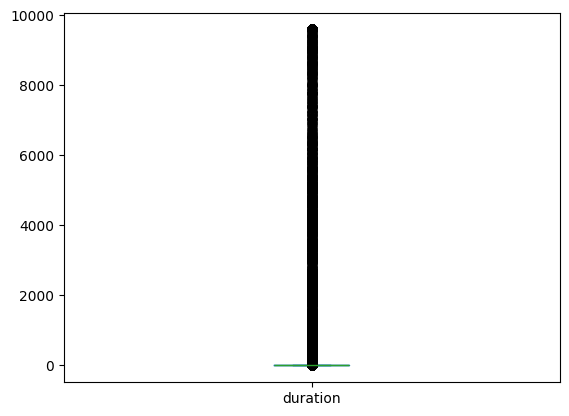

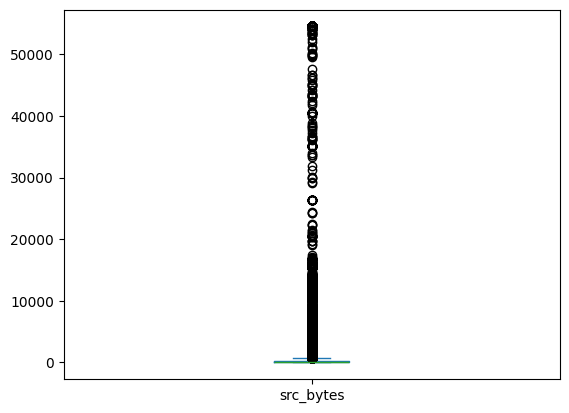

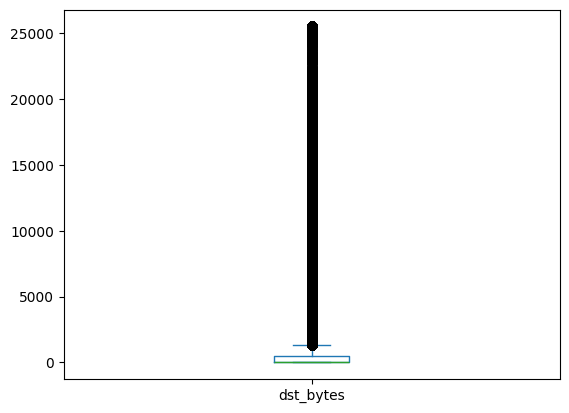

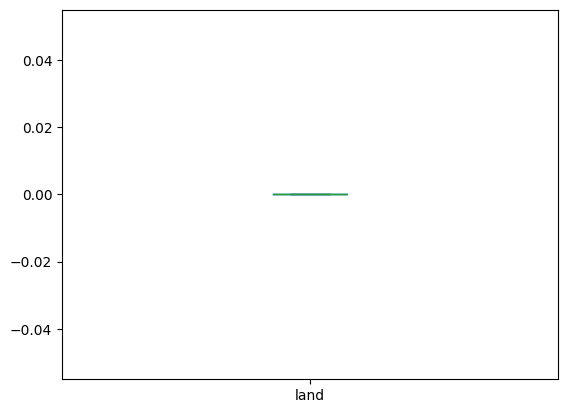

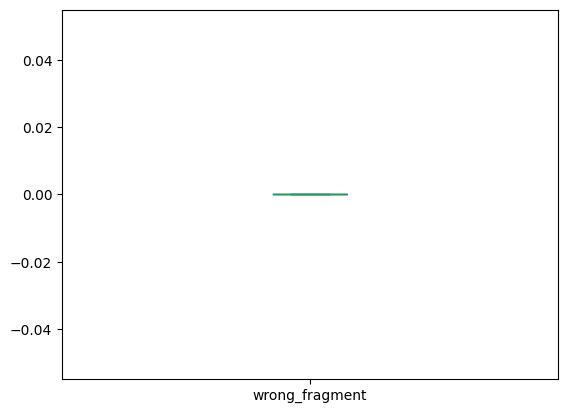

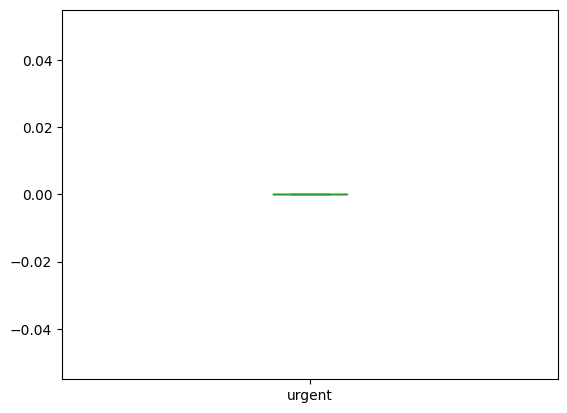

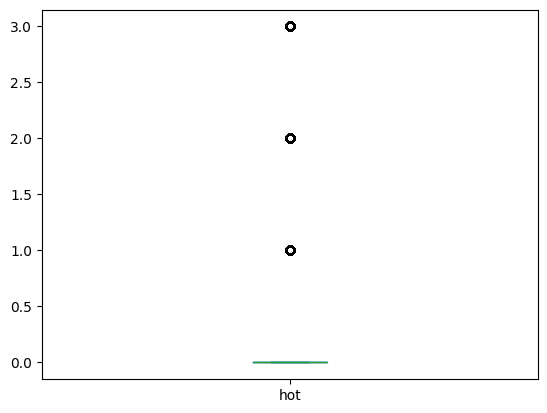

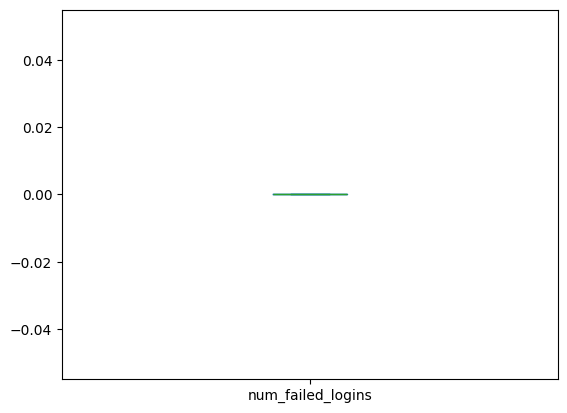

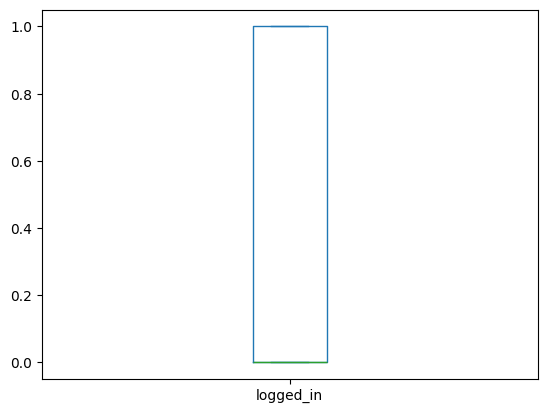

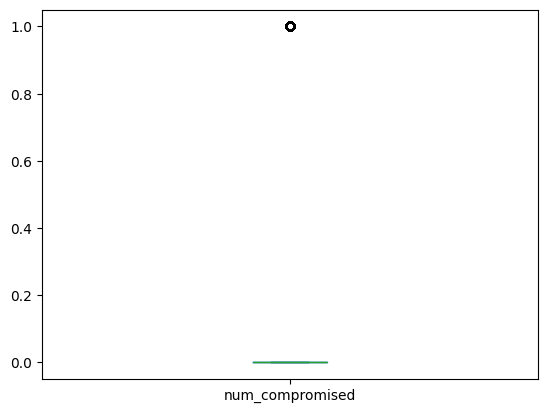

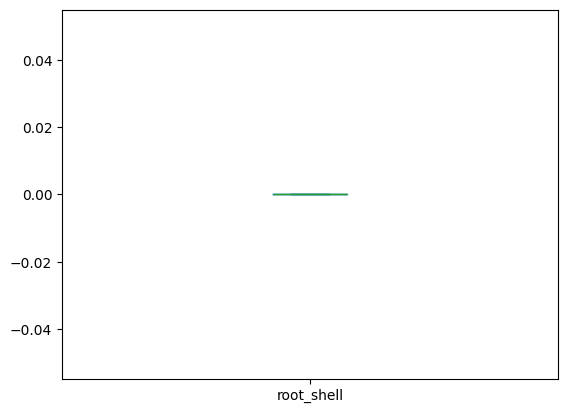

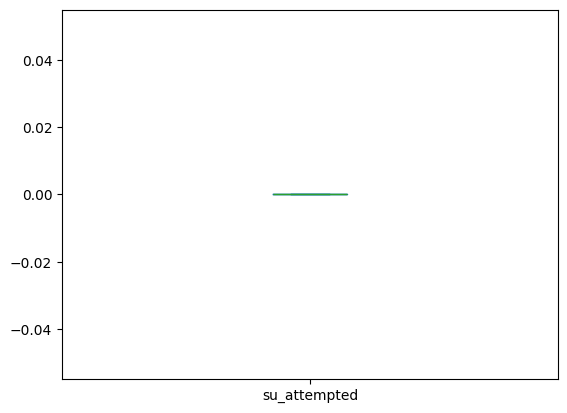

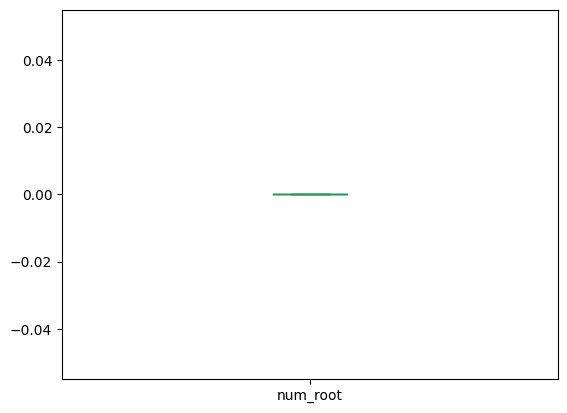

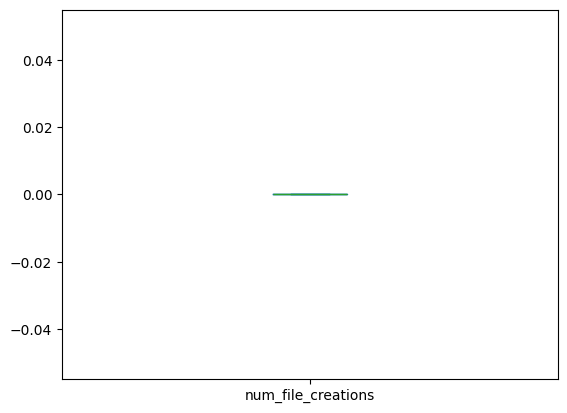

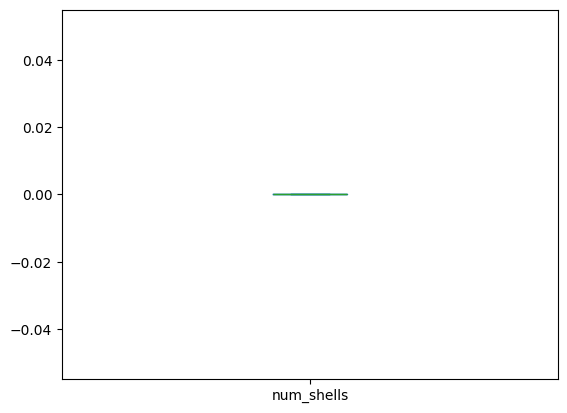

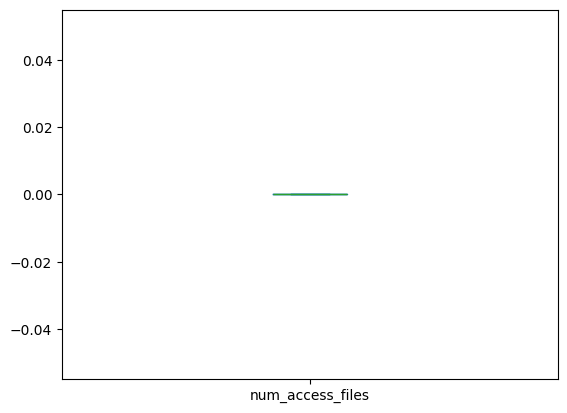

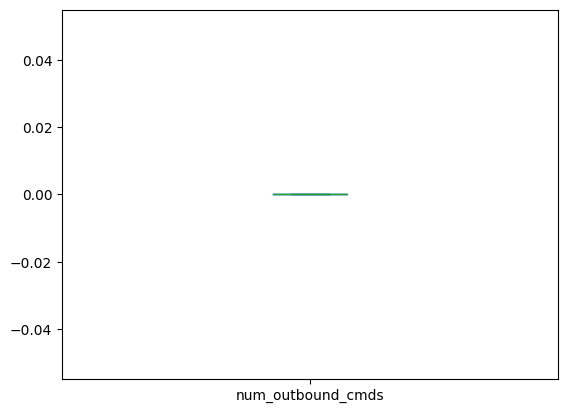

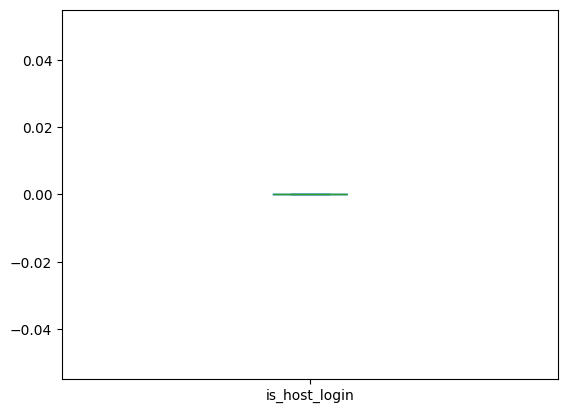

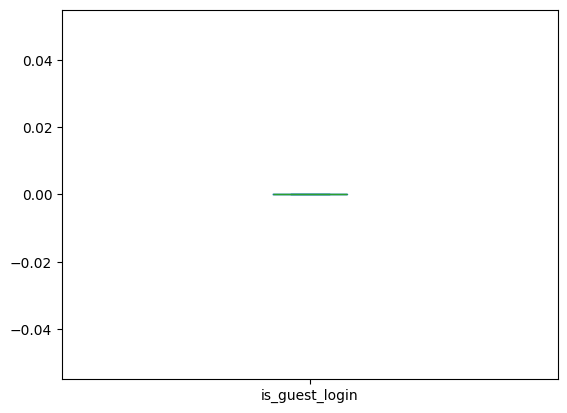

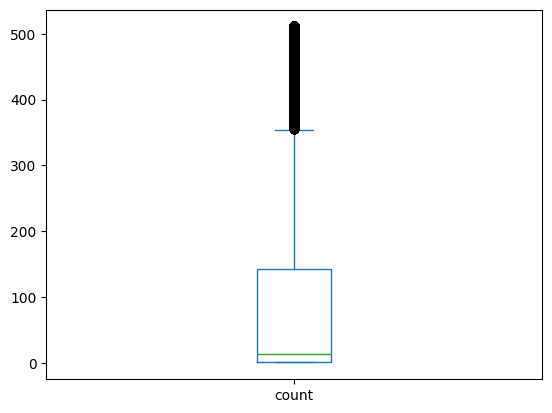

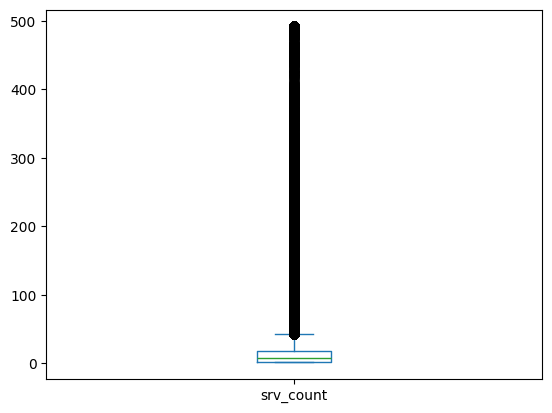

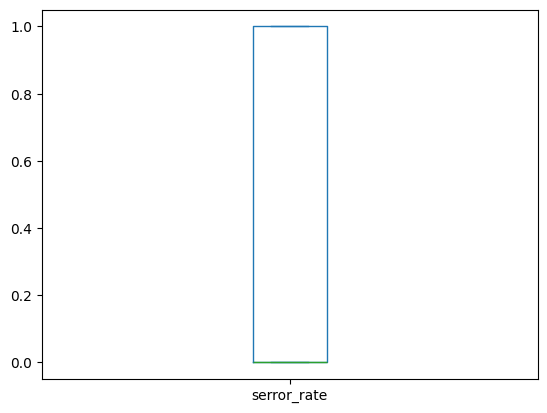

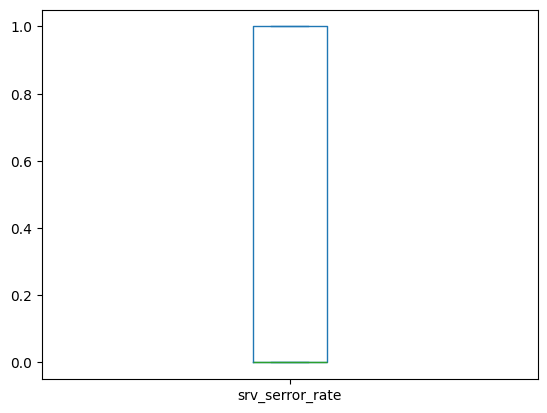

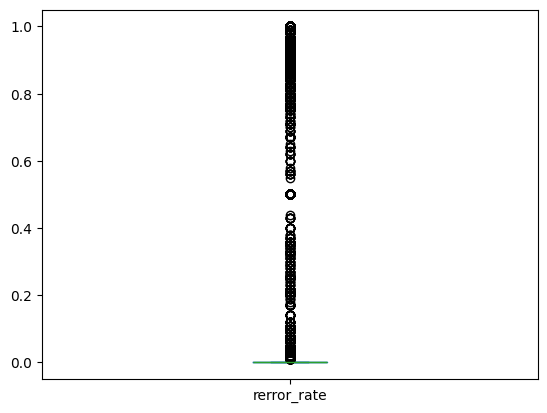

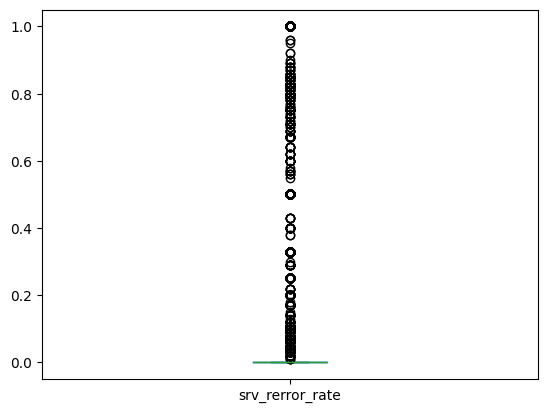

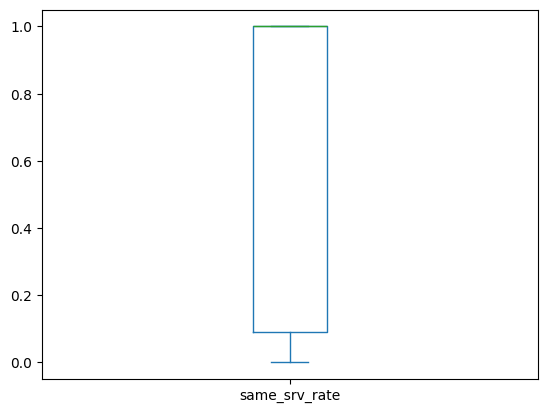

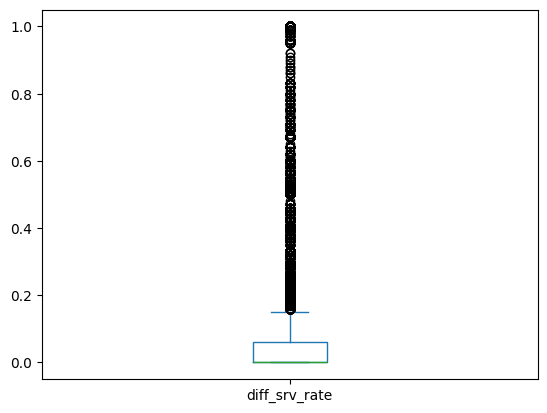

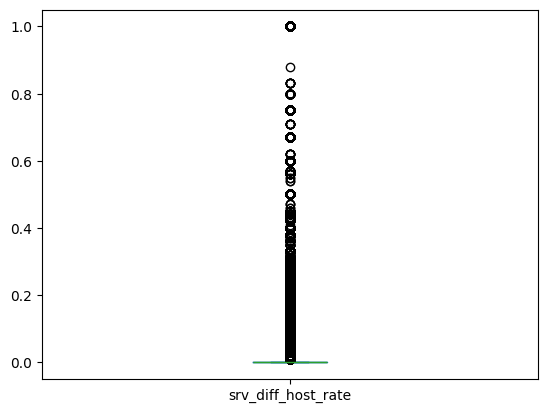

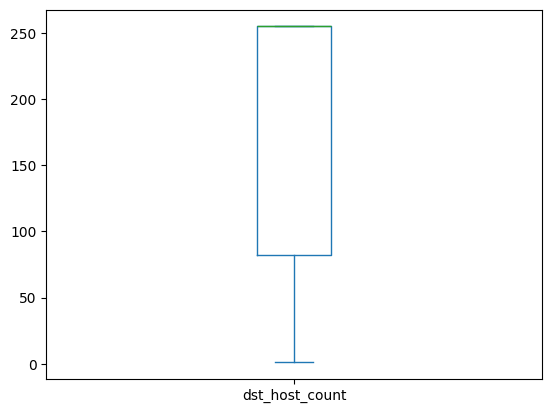

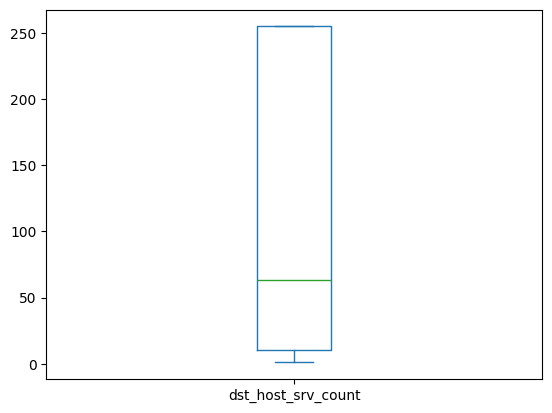

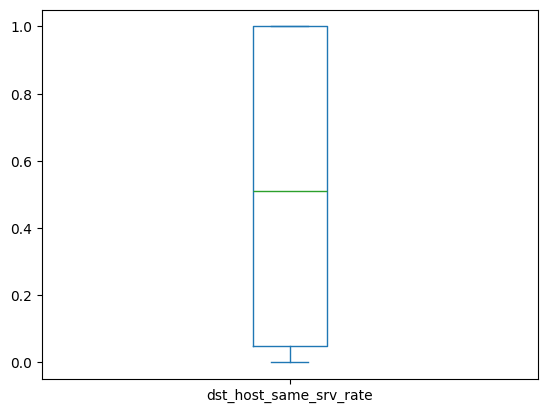

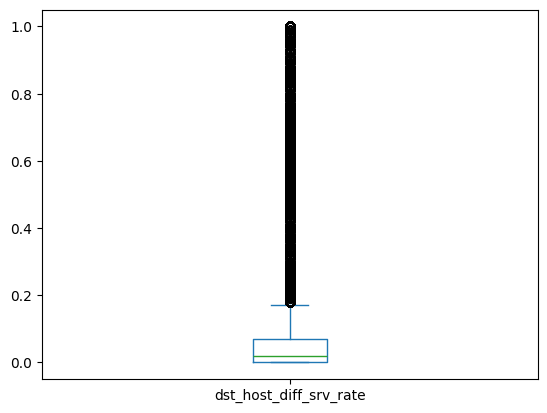

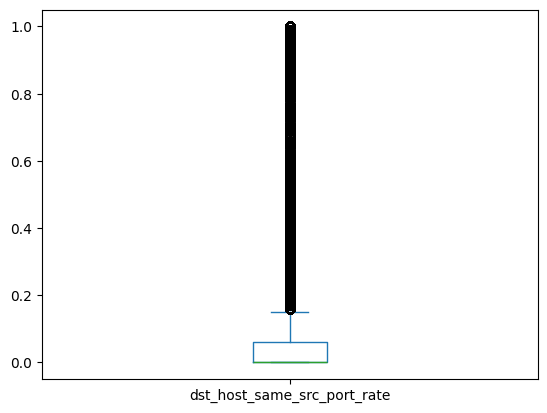

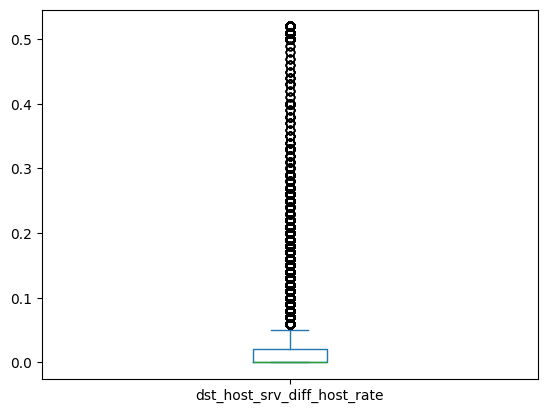

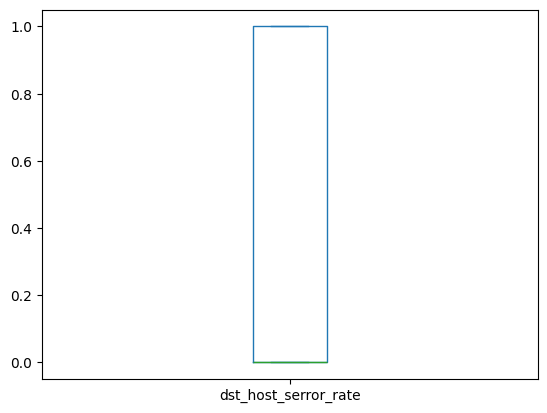

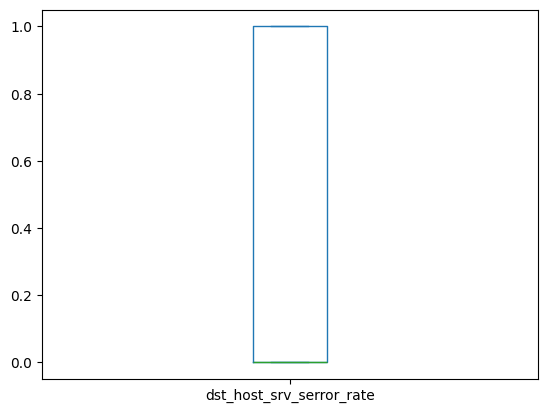

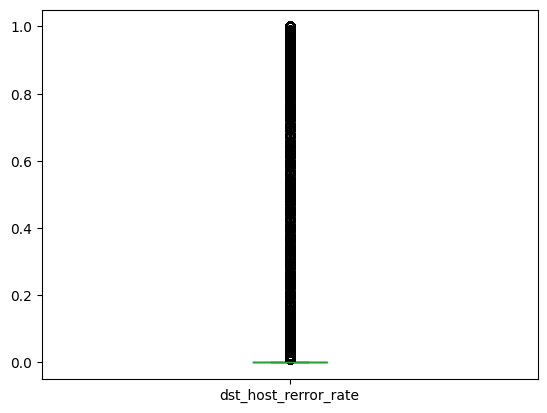

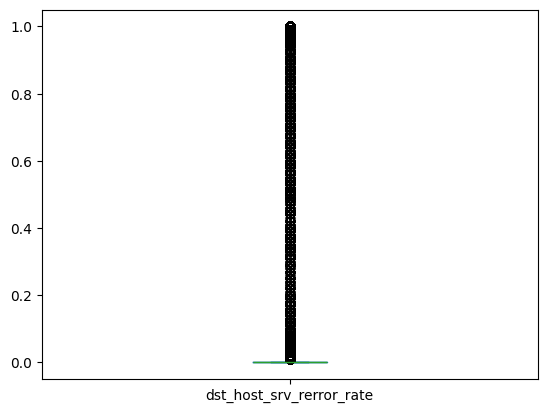

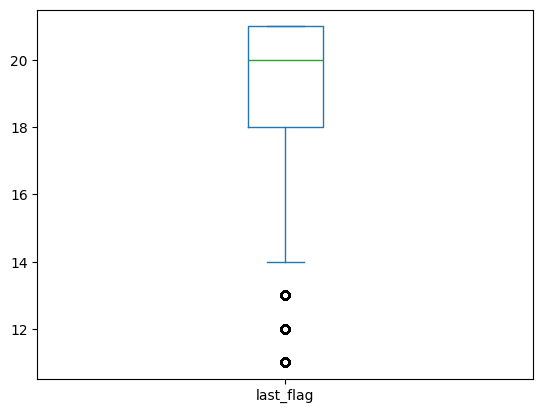

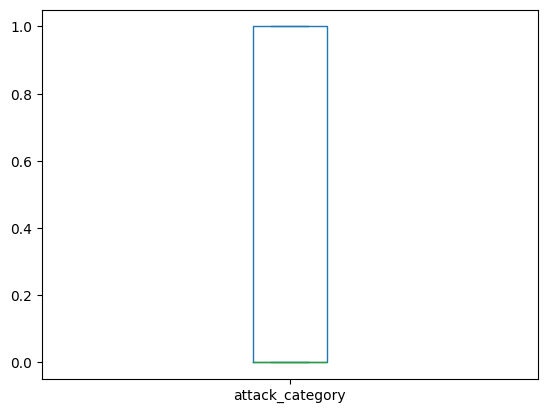

,0
duration,None
src_bytes,None
dst_bytes,None
land,None
wrong_fragment,None
urgent,None
hot,None
num_failed_logins,None
logged_in,None
num_compromised,None


In [ ]:
# after treate the outlier
train_b.select_dtypes(['int','float']).apply(box_plot)

In [ ]:
# Creating Data Audit report for numerical variable

def var_summary(x):
  return pd.Series([x.count(),x.isnull().sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.max(),
                    x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.99)],
                   index=['count','missing','mean','median','std','var','min','max','p1','p5','p99'])

train.select_dtypes(['int','float']).apply(var_summary).T

,count,missing,mean,median,std,var,min,max,p1,p5,p99
duration,125973.0,0.0,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,4.290800e+04,0.0,0.00,9590.56
src_bytes,125973.0,0.0,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,1.379964e+09,0.0,0.00,54540.00
dst_bytes,125973.0,0.0,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,1.309937e+09,0.0,0.00,25519.00
land,125973.0,0.0,0.000198,0.00,1.408607e-02,1.984174e-04,0.0,1.000000e+00,0.0,0.00,0.00
wrong_fragment,125973.0,0.0,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,3.000000e+00,0.0,0.00,0.00
urgent,125973.0,0.0,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,3.000000e+00,0.0,0.00,0.00
hot,125973.0,0.0,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,7.700000e+01,0.0,0.00,3.00
num_failed_logins,125973.0,0.0,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,5.000000e+00,0.0,0.00,0.00
logged_in,125973.0,0.0,0.395736,0.00,4.890101e-01,2.391308e-01,0.0,1.000000e+00,0.0,0.00,1.00
num_compromised,125973.0,0.0,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,7.479000e+03,0.0,0.00,1.00


In [ ]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)],
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])


train.select_dtypes(['object']).apply(lambda x: categorical_var_summary(x)).T


,N,NMISS,MODE,FREQ,PERCENT
protocol_type,125973,0,tcp,102689,81.52
service,125973,0,http,40338,32.02
flag,125973,0,SF,74945,59.49
attack,125973,0,normal,67343,53.46
attack_category,125973,0,normal,67343,53.46


In [ ]:
# Categorical columns
train_b.select_dtypes('object').nunique()

,0
protocol_type,3
service,70
flag,11


In [ ]:
test_b.select_dtypes('object').nunique()

,0
protocol_type,3
service,64
flag,11


In [ ]:
train.select_dtypes('object').nunique()

,0
protocol_type,3
service,70
flag,11
attack,23
attack_category,2


# Creating Dummy Variable

In [ ]:
# segerate the categorical column from the data
categorical_column=train_b.select_dtypes(['object']).columns

# apply one hot encoding on categorical column

train_b=pd.get_dummies(data=train_b,columns=categorical_column,drop_first=True,dtype=int)
test_b=pd.get_dummies(data=test_b,columns=categorical_column,drop_first=True,dtype=int)

In [ ]:
train_b.shape

(125973, 121)

In [ ]:
test_b.shape

(22544, 115)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [ ]:
### Correlation Matrix

# correlation matrix (ranges from 1 to -1)
corr = train_b.corr()
abs(corr['attack_category'].sort_values(ascending=False))

,attack_category
attack_category,1.000000
dst_host_srv_serror_rate,0.654985
dst_host_serror_rate,0.651842
serror_rate,0.650652
flag_S0,0.650206
...,...
num_shells,NaN
num_access_files,NaN
num_outbound_cmds,NaN
is_host_login,NaN


<Axes: >

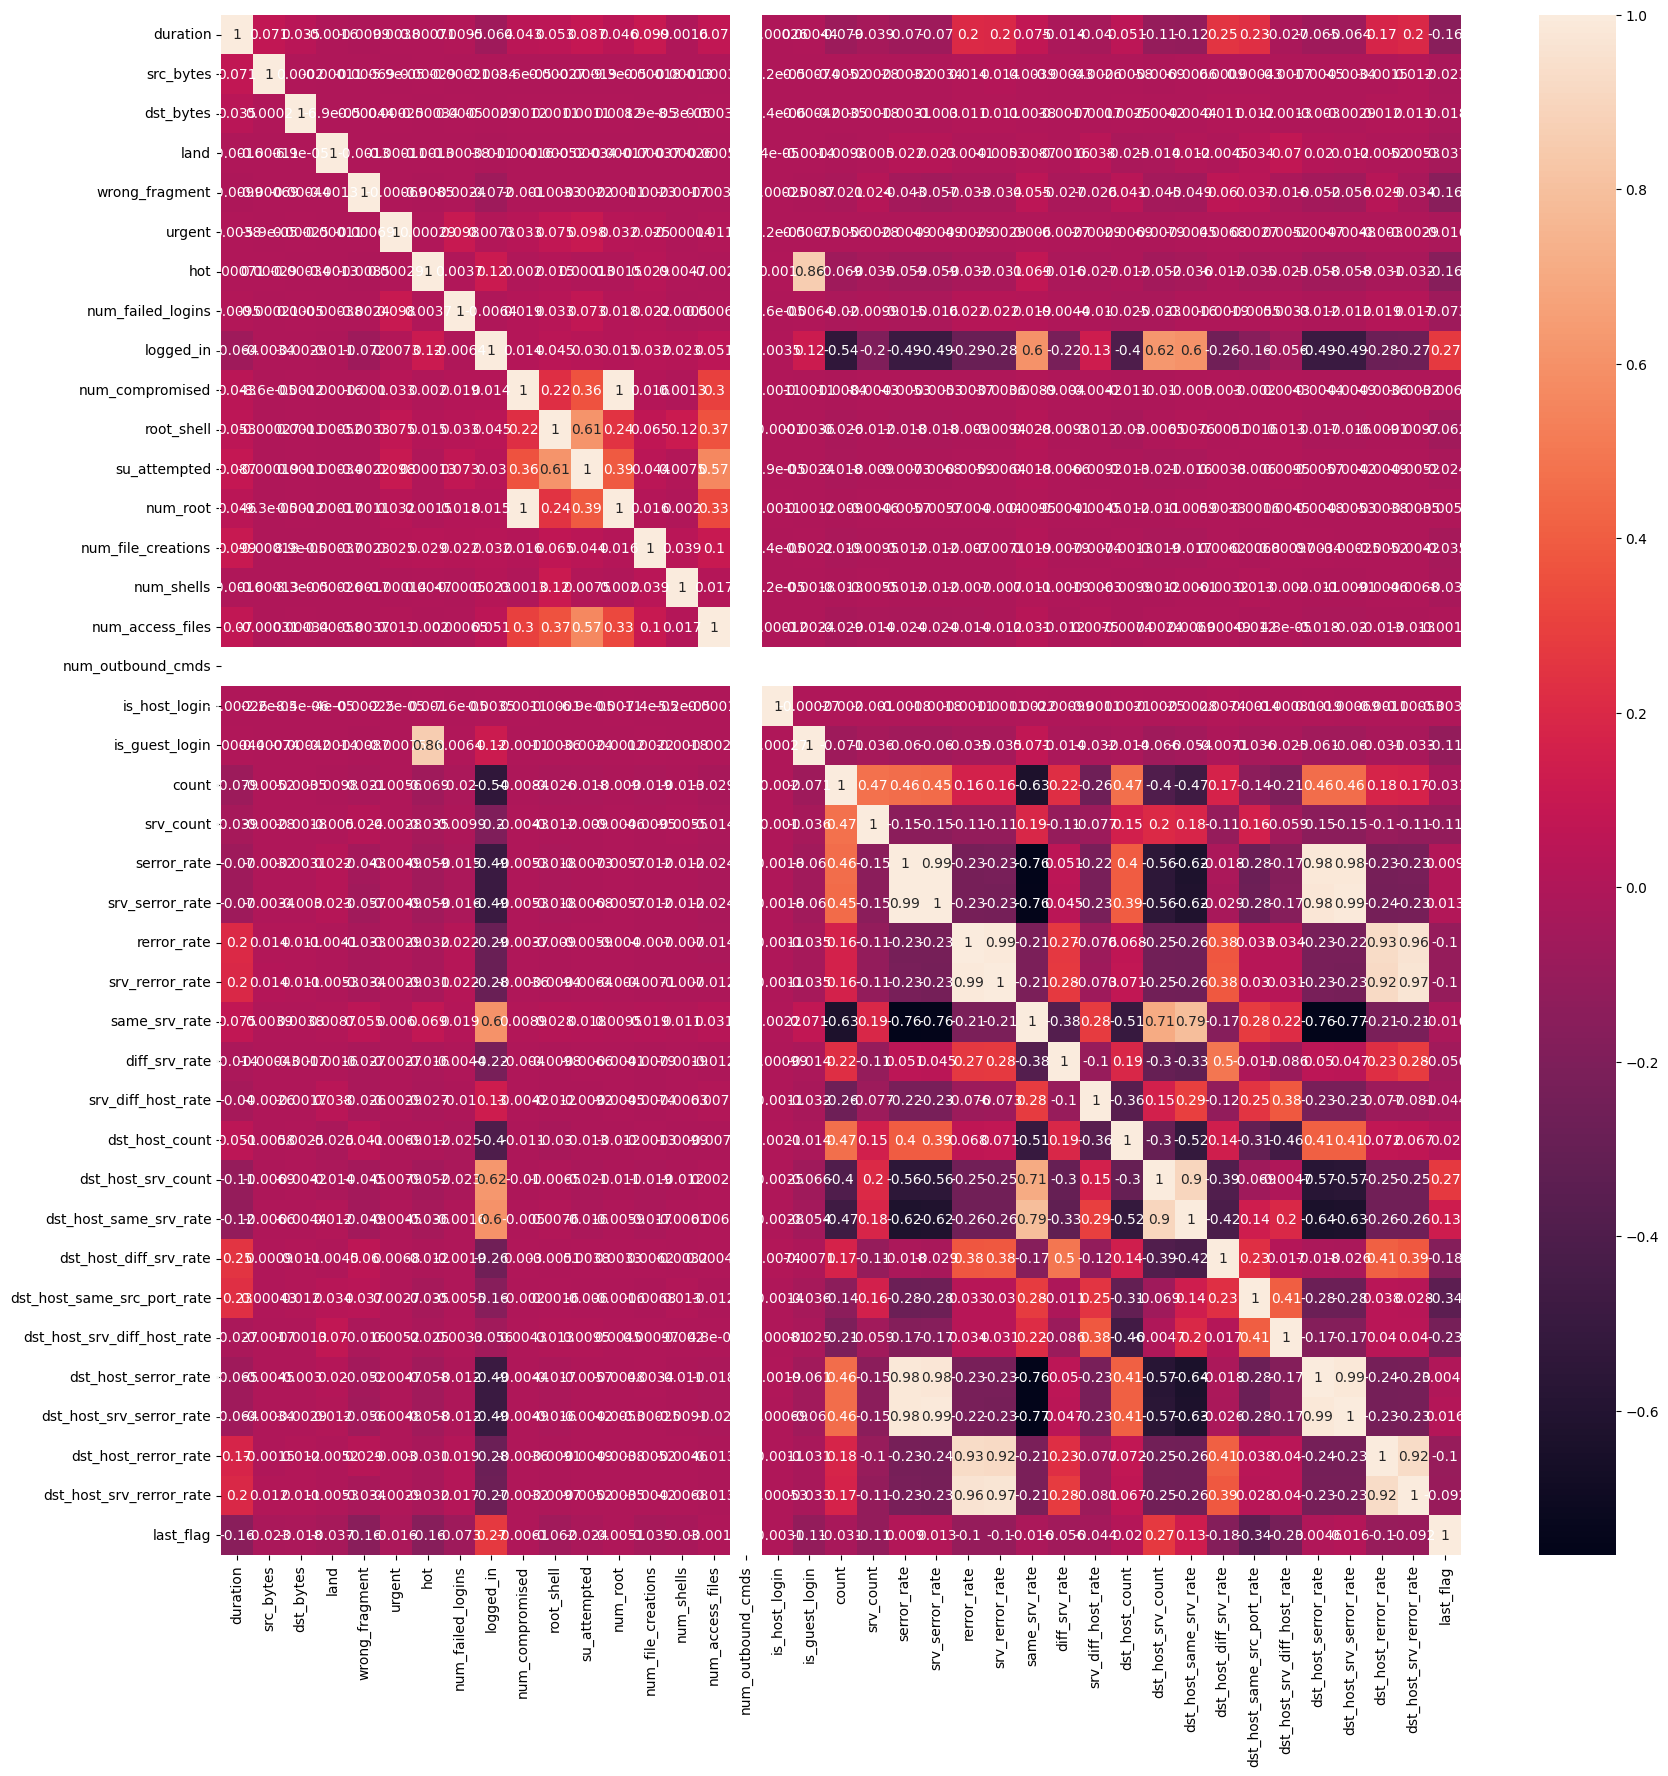

In [ ]:
# build a heat map on the correlationship matrix and identify if there is multicolenarity that exists in the data _ quantitive Analysis
plt.figure(figsize=(20,20))
sns.heatmap(train[numeric_columns].corr(),annot=True)

In [ ]:
corrm=train_b.corr()

In [ ]:
## there should be a co-relation between dependent and independent variables
corr_Y_X= corrm[(corrm.attack_category<0.1) & (corrm.attack_category>-0.1)].T.columns
corr_Y_X

Index(['duration', 'src_bytes', 'hot', 'num_compromised', 'srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'protocol_type_tcp', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_echo', 'service_efs', 'service_exec', 'service_finger',
       'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http_2784', 'service_http_443',
       'service_http_8001', 'service_imap4', 'service_iso_tsap',
       'service_klogin', 'service_kshell', 'service_ldap', 'service_link',
       'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm',
       'service_netbios_ns', 'service_netbios_ssn', 'service_netstat',
       'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other',
       'service_pm_dump', 'service_pop_2', 'ser

In [ ]:
corr_Y_X.shape

(77,)

# Feature importance from Random Forest model


In [ ]:
# Removing the extra features
x=train_b.nunique()[train_b.nunique()>1].index
train_b=train_b[x]

In [ ]:
train_b.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,srv_serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,491,0,0,0,0,2,2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,146,0,0,0,0,13,1,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0,0,0,0,0,123,6,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,232,8153,0,1,0,5,5,0.2,0.2,...,0,0,0,0,0,0,0,0,1,0
4,0.0,199,420,0,1,0,30,32,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# apply Ref reccurcive feature elimantion

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# splitting The data
# or x= train_b.columns.difference(['attack_category'])

X = train_b.drop(columns=['attack_category'])
y = train_b['attack_category']


In [ ]:
train_b_x,test_b_x,train_b_y,test_b_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
radm_clf=RandomForestClassifier(n_estimators=100,random_state=42,oob_score=True)
#n_estimators=100(default),criterion ='gini'(default)
radm_clf.fit(train_b_x,train_b_y)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
radm_clf.score(train_b_x,train_b_y)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_b_y,radm_clf.predict(train_b_x))

array([[53921,     0],
       [    0, 46857]])

In [ ]:
accuracy_score(train_b_y,radm_clf.predict(train_b_x))

1.0

In [ ]:
radm_clf.oob_score_

0.9996527019786065

In [ ]:
radm_clf=RandomForestClassifier(n_estimators=100,random_state=4,max_depth=10,oob_score=True,max_features=10,
                                min_samples_leaf=3,n_jobs=-1)
#n_estimators=100(default),criterion ='gini'(default
radm_clf.fit(train_b_x,train_b_y)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=3,
                       n_jobs=-1, oob_score=True, random_state=4)

In [ ]:
radm_clf.score(train_b_x,train_b_y)

0.9984917343070908

In [ ]:
radm_clf.oob_score_

0.9981444362856973

In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
# np.argsort()use to get the indices of the sorted feature importanc(from least to greatest)
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_b_x.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_b_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

In [ ]:
indices

array([  1,   2, 105,  17,  13,  25,  12,  16,   6,  22,  21,  18,   4,
         9,  19,  76,   8,  51,  42,  15,   7,  20,  23, 101,  26,  41,
        10,  24,  14,   3,  11,  39,  27,   5,  47,   0,  97, 100,  71,
        92,  87,  81,  46,  45,  98, 102,  31, 106,  37, 103,  28,  90,
        99,  55,  70,  38,  83,  48,  29,  88,  60,  72,  59, 104,  74,
        77,  69,  62,  65,  86,  53,  93,  32,  96,  80,  68,  57,  44,
        43,  64,  61,  84,  33,  56,  63,  40,  50,  79,  73,  95,  34,
        94,  36,  67,  54,  52,  91,  35,  89,  49,  85,  82,  78,  75,
        66,  30,  58])

    rank                      feature  importance
0      1                    src_bytes    0.114794
1      2                    dst_bytes    0.102211
2      3                      flag_SF    0.074799
3      4       dst_host_same_srv_rate    0.062458
4      5                diff_srv_rate    0.056840
5      6                    last_flag    0.055987
6      7                same_srv_rate    0.053199
7      8           dst_host_srv_count    0.048693
8      9                        count    0.044833
9     10     dst_host_srv_serror_rate    0.032132
10    11         dst_host_serror_rate    0.031781
11    12       dst_host_diff_srv_rate    0.027012
12    13                    logged_in    0.026723
13    14              srv_serror_rate    0.026063
14    15  dst_host_same_src_port_rate    0.022635
15    16              service_private    0.021019
16    17                  serror_rate    0.019787
17    18                 service_http    0.017591
18    19                service_ecr_i    0.014774


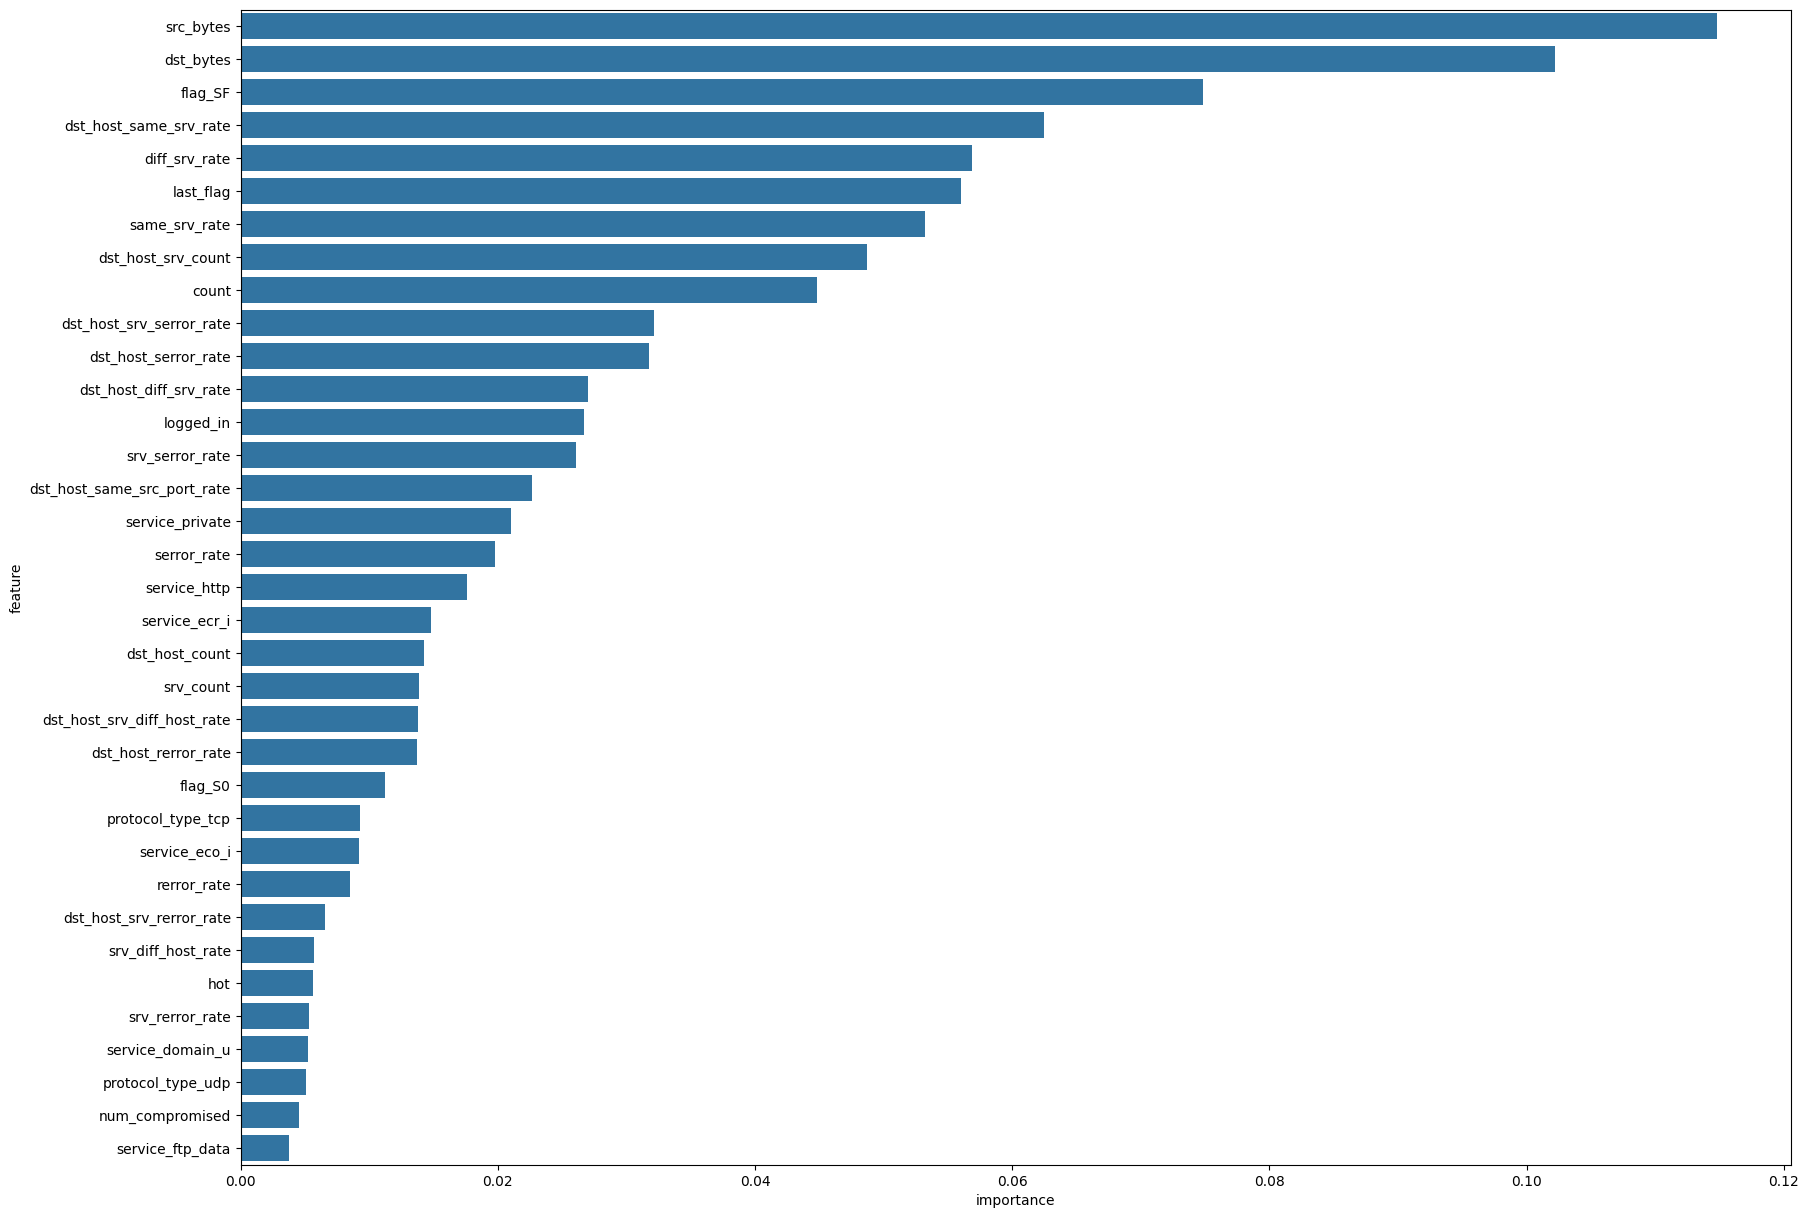

In [ ]:
print(feature_rank.iloc[0:35])
plt.figure(figsize=(20,15))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank.iloc[0:35])
plt.show()

In [ ]:
# Retaining 25 columns

feature_rf=list(feature_rank.feature[0:25])
feature_rf

['src_bytes',
 'dst_bytes',
 'flag_SF',
 'dst_host_same_srv_rate',
 'diff_srv_rate',
 'last_flag',
 'same_srv_rate',
 'dst_host_srv_count',
 'count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_diff_srv_rate',
 'logged_in',
 'srv_serror_rate',
 'dst_host_same_src_port_rate',
 'service_private',
 'serror_rate',
 'service_http',
 'service_ecr_i',
 'dst_host_count',
 'srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'flag_S0',
 'protocol_type_tcp']

In [ ]:
train_b[feature_rf]

,src_bytes,dst_bytes,flag_SF,dst_host_same_srv_rate,diff_srv_rate,last_flag,same_srv_rate,dst_host_srv_count,count,dst_host_srv_serror_rate,...,service_private,serror_rate,service_http,service_ecr_i,dst_host_count,srv_count,dst_host_srv_diff_host_rate,dst_host_rerror_rate,flag_S0,protocol_type_tcp
0,491,0,1,0.17,0.00,20,1.00,25,2,0.00,...,0,0.0,0,0,150,2,0.00,0.05,0,1
1,146,0,1,0.00,0.15,15,0.08,1,13,0.00,...,0,0.0,0,0,255,1,0.00,0.00,0,0
2,0,0,0,0.10,0.07,19,0.05,26,123,1.00,...,1,1.0,0,0,255,6,0.00,0.00,1,1
3,232,8153,1,1.00,0.00,21,1.00,255,5,0.01,...,0,0.2,1,0,30,5,0.04,0.00,0,1
4,199,420,1,1.00,0.00,21,1.00,255,30,0.00,...,0,0.0,1,0,255,32,0.00,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0.10,0.06,20,0.14,25,184,1.00,...,1,1.0,0,0,255,25,0.00,0.00,1,1
125969,105,145,1,0.96,0.00,21,1.00,244,2,0.00,...,1,0.0,0,0,255,2,0.00,0.00,0,0
125970,2231,384,1,0.12,0.00,18,1.00,30,1,0.00,...,0,0.0,0,0,255,1,0.00,0.01,0,1
125971,0,0,0,0.03,0.05,20,0.06,8,144,1.00,...,0,1.0,0,0,255,8,0.00,0.00,1,1


## check Multicolinearity among independent variables. (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from patsy import dmatrices

In [ ]:
#gather features from feature_rf
vif1 = pd.DataFrame()
def cal_vif(f,v):
    featuresn = train_b[f].columns
    featuresn = '+'.join(featuresn)
    featuresn = 'attack_category~'+featuresn
    y, X = dmatrices(featuresn, train_b, return_type='dataframe')
    v = pd.DataFrame()
    v['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    v['features'] = X.columns
    return v.sort_values('VIF Factor',ascending=False)

In [ ]:
cal_vif(feature_rf,vif1)

,VIF Factor,features
0,303.182592,Intercept
14,116.728520,srv_serror_rate
17,93.583252,serror_rate
10,64.098494,dst_host_srv_serror_rate
11,44.491860,dst_host_serror_rate
24,40.078719,flag_S0
3,19.798275,flag_SF
4,12.607340,dst_host_same_srv_rate
7,11.624688,same_srv_rate
13,11.593096,logged_in


## Random forest useing grid search cv method


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define The Hyperparameter grid

param_grid={'n_estimators':[100,150,200],'max_depth':[10,15,20],'min_samples_leaf':[1,2,3,5],\
            'max_features':['auto','sqrt','log2'],'criterion':['gini','entropy']}

# create a Random forest classifier object:
ref_classifier=RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)

# create a grid_search cv object:\

grid_search=GridSearchCV(estimator=ref_classifier,param_grid=param_grid,cv=5,
                         scoring='accuracy',n_jobs=-1,verbose=2)

In [ ]:
# fit the GridSearchCv oject to the training Data:
grid_search.fit(train_b_x,train_b_y)
# in this total models=3*3*4*3*2=216
# total model fits:= 216*5=1080


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# get the best hyperparameters
best_params=grid_search.best_params_
print('Best Hyperparameters:',best_params)

# get the best estimator(model)
best_model=grid_search.best_estimator_

# get the best score
best_score=grid_search.best_score_
print('Best Score:',best_score)

(100778, 107)

In [ ]:
# evaluate the model's performance on the test data

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred=best_model.predict(test_b_x)
# Accuracy Score
print('Accuracy Score:',accuracy_score(test_b_y,y_pred))
# Classification report
print('Classification Report:\n',classification_report(test_b_y,y_pred))
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(test_b_y,y_pred))
sns.heatmap(confusion_matrix(test_b_y,y_pred),annot=True)

In [ ]:
from sklearn.feature_selection import RFE

RFE?